In [2]:
# spec_mmwave：毫米波的stft结果，采样率为16000hz；
# spec_audio：语音的stft结果，采样率为16000hz；
# columns：未说话片段时间索引；
# spec_noise : 噪音的stft结果，采样率为16000hz。

import h5py
import torch

file_path = r'/home/mambauser/MMClassify/data/data_processed_noise_mma.hdf5'

preloaded_data = {}
preloaded_noise = {}
with h5py.File(file_path, 'r') as hdf5_file:
    group_names = [i for i in hdf5_file.keys() if i != 'various_noise']
    noise_list = [
        i[11:] for i in hdf5_file['various_noise'].keys()
        if 'spec_NOISE_' in i
    ]
    for group_name in group_names:
        try:
            preloaded_data[group_name] = {
                'spec_mmwave':
                torch.from_numpy(
                    hdf5_file[group_name]['spec_mmwave'][:]).to(
                        torch.complex64),
                'spec_audio':
                torch.from_numpy(
                    hdf5_file[group_name]['spec_audio'][:]).to(
                        torch.complex64),
                'columns':
                hdf5_file[group_name]['columns'][:]
            }
        except KeyError as e:
            print(f"KeyError for group {group_name}: {e}")
    preloaded_noise = {
        noise: {
            'spec_noise':
            torch.from_numpy(
                hdf5_file['various_noise'][f'spec_NOISE_{noise}'][:])
        }
        for noise in noise_list
    }

In [ ]:
group_names

In [3]:
silent = preloaded_data[group_name]["columns"]

# 初始化变量
segments = []
current_segment = [silent[0]]

# 遍历数组，查找连续的段
for i in range(1, len(silent)):
    if silent[i] == silent[i - 1] + 1:
        current_segment.append(silent[i])
    else:
        segments.append(current_segment)
        current_segment = [silent[i]]

# 添加最后一个段
if current_segment:
    segments.append(current_segment)

# 统计结果
segment_lengths = [len(segment) for segment in segments]

# 输出结果
print(f"未说话的片段数：{len(segments)}")
print("每个片段的长度：", segment_lengths)

silent_set = set(silent)
speaking_set = sorted(set(range(preloaded_data[group_name]['spec_mmwave'].shape[1])) - silent_set)

# 初始化变量
speaking_segments = []
current_segment = [speaking_set[0]]

# 遍历数组，查找连续的段
for i in range(1, len(speaking_set)):
    if speaking_set[i] == speaking_set[i - 1] + 1:
        current_segment.append(speaking_set[i])
    else:
        speaking_segments.append(current_segment)
        current_segment = [speaking_set[i]]

# 添加最后一个段
if current_segment:
    speaking_segments.append(current_segment)

# 统计结果
speaking_lengths = [len(segment) for segment in speaking_segments]

# 输出结果
print(f"说话的片段数：{len(speaking_segments)}")
print("每个说话片段的长度：", speaking_lengths)

未说话的片段数：28
每个片段的长度： [4, 73, 10, 68, 4, 90, 110, 5, 79, 79, 12, 84, 15, 23, 81, 5, 94, 7, 6, 2, 4, 107, 4, 2, 90, 1, 89, 3]
说话的片段数：29
每个说话片段的长度： [62, 44, 98, 33, 52, 105, 151, 64, 89, 132, 44, 86, 33, 45, 44, 80, 84, 59, 50, 27, 36, 89, 81, 69, 24, 98, 57, 32, 67]


In [4]:
lst_silent = []
lst_speaking = []

for group_name in group_names:
    silent = preloaded_data[group_name]["columns"]
    
    if len(silent) == 0:
        print(group_name)
        continue

    # 初始化变量
    segments = []
    current_segment = [silent[0]]

    # 遍历数组，查找连续的段
    for i in range(1, len(silent)):
        if silent[i] == silent[i - 1] + 1:
            current_segment.append(silent[i])
        else:
            segments.append(current_segment)
            current_segment = [silent[i]]

    # 添加最后一个段
    if current_segment:
        segments.append(current_segment)

    # 统计结果
    segment_lengths = [len(segment) for segment in segments]

    # # 输出结果
    # print(f"未说话的片段数：{len(segments)}")
    # print("每个片段的长度：", segment_lengths)

    silent_set = set(silent)
    speaking_set = sorted(set(range(preloaded_data[group_name]['spec_mmwave'].shape[1])) - silent_set)

    # 初始化变量
    speaking_segments = []
    current_segment = [speaking_set[0]]

    # 遍历数组，查找连续的段
    for i in range(1, len(speaking_set)):
        if speaking_set[i] == speaking_set[i - 1] + 1:
            current_segment.append(speaking_set[i])
        else:
            speaking_segments.append(current_segment)
            current_segment = [speaking_set[i]]

    # 添加最后一个段
    if current_segment:
        speaking_segments.append(current_segment)

    # 统计结果
    speaking_lengths = [len(segment) for segment in speaking_segments]
    
    if max(segment_lengths)>1000:
        print(group_name)

    # # 输出结果
    # print(f"说话的片段数：{len(speaking_segments)}")
    # print("每个说话片段的长度：", speaking_lengths)
    
    lst_silent += segment_lengths
    lst_speaking += speaking_lengths

google_commends_13_1
google_commends_13_2
google_commends_13_4
google_commends_16_8
google_commends_19_4
google_commends_23_8
google_commends_24_0
google_commends_29_6
google_commends_29_7
timit_16_5
timit_23_7


In [ ]:
preloaded_data["google_commends_13_1"]["columns"]

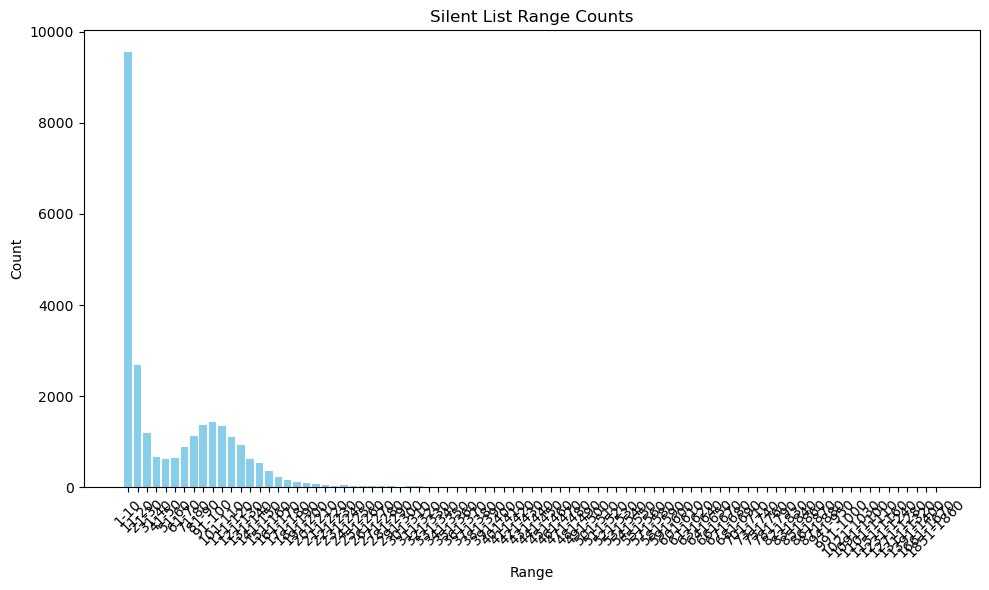

{'1-10': 9555, '11-20': 2675, '21-30': 1180, '31-40': 670, '41-50': 608, '51-60': 640, '61-70': 880, '71-80': 1127, '81-90': 1365, '91-100': 1431, '101-110': 1338, '111-120': 1101, '121-130': 925, '131-140': 627, '141-150': 531, '151-160': 353, '161-170': 229, '171-180': 164, '181-190': 124, '191-200': 88, '201-210': 68, '211-220': 58, '221-230': 28, '231-240': 40, '241-250': 19, '251-260': 24, '261-270': 19, '271-280': 20, '281-290': 19, '291-300': 12, '301-310': 20, '311-320': 19, '321-330': 12, '331-340': 10, '341-350': 9, '351-360': 7, '361-370': 10, '371-380': 8, '381-390': 11, '391-400': 9, '401-410': 6, '411-420': 6, '421-430': 1, '431-440': 5, '441-450': 3, '451-460': 11, '461-470': 2, '471-480': 5, '481-490': 3, '491-500': 5, '501-510': 3, '511-520': 4, '521-530': 2, '531-540': 2, '541-550': 4, '551-560': 3, '571-580': 3, '581-590': 1, '591-600': 2, '601-610': 1, '611-620': 1, '631-640': 3, '641-650': 1, '661-670': 2, '671-680': 2, '681-690': 1, '701-710': 1, '731-740': 1, '75

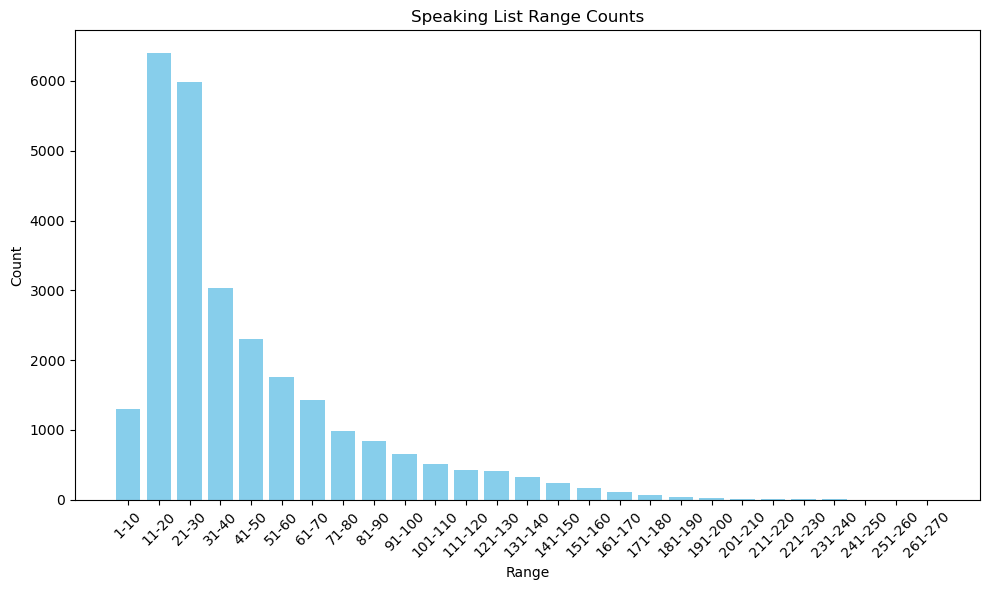

{'1-10': 1296, '11-20': 6405, '21-30': 5988, '31-40': 3040, '41-50': 2307, '51-60': 1752, '61-70': 1426, '71-80': 981, '81-90': 839, '91-100': 654, '101-110': 518, '111-120': 432, '121-130': 408, '131-140': 320, '141-150': 235, '151-160': 169, '161-170': 107, '171-180': 62, '181-190': 36, '191-200': 28, '201-210': 9, '211-220': 4, '221-230': 6, '231-240': 4, '241-250': 3, '251-260': 1, '261-270': 1}


In [5]:
from collections import Counter
import matplotlib.pyplot as plt

def count_ranges(numbers, interval=10):
    counter = Counter((num - 1) // interval for num in numbers)
    range_counts = {f"{i * interval + 1}-{(i + 1) * interval}": count for i, count in sorted(counter.items())}
    return range_counts

def plot_histogram(range_counts, title):
    ranges = list(range_counts.keys())
    counts = list(range_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(ranges, counts, color='skyblue')
    plt.xlabel('Range')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 统计范围并绘制柱状图
range_counts_silent = count_ranges(lst_silent)
plot_histogram(range_counts_silent, 'Silent List Range Counts')
print(range_counts_silent)

range_counts_speaking = count_ranges(lst_speaking)
plot_histogram(range_counts_speaking, 'Speaking List Range Counts')
print(range_counts_speaking)